# **Linear Regression Project: House Price Prediction**


# **1.DATA COLLECTION**

In [1]:
import pandas as pd 

#Loading dataset
df=pd.read_csv("/Users/roshanshetty/Downloads/ House Price Prediction/BostonHousing.csv")

#Preveiwing the dataset
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**About Dataset**

1. crim: Per capita crime rate by town.

2. zn: Proportion of large residential lots (over 25,000 sq. ft.).

3. indus: Proportion of non-retail business acres per town.

4. Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).

5. nox: Concentration of nitrogen oxides in the air.

6. rm: Average number of rooms per dwelling.

7. age: Proportion of old owner-occupied units built before 1940.

8. dis: Weighted distances to Boston employment centers.

9. rad: Index of accessibility to radial highways.

10. tax: Property tax rate per $10,000.

11. ptratio: Pupil-teacher ratio by town

12. b: 1000 × (Bk - 0.63)² where Bk is the proportion of Black residents by town

13. lstat: Percentage of lower status of the population

14. medv: Median value of owner-occupied homes in $1000s 

These features provide valuable information about the characteristics of neighborhoods that can influence housing prices.

# **2.DATA PREPROCESSING**

**2.1 Finding missing values**

In [6]:
#Finding missing values:
df.isnull()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
total_missing=df.isnull().sum().sum()
print(total_missing)

5


In [8]:
missing_data=df[df.isnull().any(axis=1)]
print(missing_data)

        crim    zn  indus  chas    nox  rm   age     dis  rad  tax  ptratio  \
10   0.22489  12.5   7.87     0  0.524 NaN  94.3  6.3467    5  311     15.2   
35   0.06417   0.0   5.96     0  0.499 NaN  68.2  3.3603    5  279     19.2   
63   0.12650  25.0   5.13     0  0.453 NaN  43.4  7.9809    8  284     19.7   
96   0.11504   0.0   2.89     0  0.445 NaN  69.6  3.4952    2  276     18.0   
135  0.55778   0.0  21.89     0  0.624 NaN  98.2  2.1107    4  437     21.2   

          b  lstat  medv  
10   392.52  20.45  15.0  
35   396.90   9.68  18.9  
63   395.58   9.50  25.0  
96   391.83  11.34  21.4  
135  394.67  16.96  18.1  


Missing values are found in the ‘rm’ column at rows 10, 35, 63, 96, and 135.
Handling these missing entries is important to ensure accurate data analysis and model performance.

**2.2 Handling Missing Values**

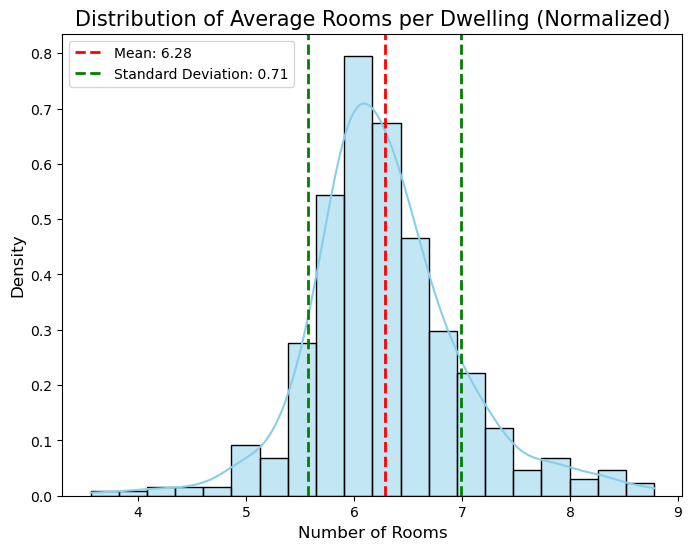

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Plotting the distribution with normalization (using seaborn for better visual)
plt.figure(figsize=(8, 6))

# Plot histogram and normalize it with KDE
sns.histplot(df['rm'], kde=True, stat="density", bins=20, color='skyblue', edgecolor='black')

# Calculate and display mean and standard deviation
mean_rm = df['rm'].mean()
std_rm = df['rm'].std()

# Adding title, labels, and annotations
plt.title('Distribution of Average Rooms per Dwelling (Normalized)', fontsize=15)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Annotate mean and standard deviation
plt.axvline(mean_rm, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_rm:.2f}')
plt.axvline(mean_rm + std_rm, color='green', linestyle='dashed', linewidth=2, label=f'Standard Deviation: {std_rm:.2f}')
plt.axvline(mean_rm - std_rm, color='green', linestyle='dashed', linewidth=2)

# Display legend
plt.legend()

# Show the plot
plt.show()

**Here are interpretations from the Graph:**

* Average rooms per dwelling are centrally distributed around 6.28.

* The spread of average rooms is moderately narrow (standard deviation of 0.71).

Median doesn't fully utilize the distribution's information in a near-symmetrical dataset, and mode is unstable and can create artificial spikes in continuous-like data upon imputation.

Mean is the most appropriate imputation method here because it best represents the central tendency of this approximately symmetrical distribution without introducing bias.

In [12]:
# Descriptive Statistics
desc_stats = df['rm'].describe()

# Skewness and Kurtosis
data_skewness = skew(df['rm'])
data_kurtosis = kurtosis(df['rm'])

print("Descriptive Statistics:")
print(desc_stats)
print(f"Skewness: {data_skewness:.2f}")
print(f"Kurtosis: {data_kurtosis:.2f}")

Descriptive Statistics:
count    501.000000
mean       6.284341
std        0.705587
min        3.561000
25%        5.884000
50%        6.208000
75%        6.625000
max        8.780000
Name: rm, dtype: float64
Skewness: nan
Kurtosis: nan


**Here are the interpretations:**

1.  There are 501 observations for the average number of rooms.

2.  The average (mean) number of rooms is approximately 6.28.

3.  The typical deviation from the average number of rooms is about 0.71 (standard deviation).

4.  The minimum average number of rooms observed is 3.56.

5.  25% of the observations have an average number of rooms less than or equal to 5.88.

6.  50% of the observations have an average number of rooms less than or equal to 6.21 (median).

7.  75% of the observations have an average number of rooms less than or equal to 6.63.

8.  The maximum average number of rooms observed is 8.78.

9.  Skewness and kurtosis could not be calculated from this data.

In [21]:
#Fill missing values with mean

df.fillna(df.mean(numeric_only=True), inplace=True)

In [22]:
df.shape

(506, 14)

In [24]:
df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575000,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421000,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185000,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998000,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147000,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430000,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012000,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172000,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631000,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004000,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


we can see that the **10th** row having the cloumn **"rm"** is filled with **mean 6.284341** 

# **3.FEATURE SELECTION**

**3.1 Correlation Check**

In [26]:
correlation = df.corr()
print(correlation['medv'].sort_values(ascending=False))

medv       1.000000
rm         0.695375
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


**Correlation with medv was analyzed to identify features that strongly influence house prices and improve prediction accuracy. Because medv is the target variable, the value we want to predict.**

Interpretation:
	
    •	rm has the strongest positive correlation (+0.695) with medv.

	•	lstat has the strongest negative correlation (–0.738) with medv.

	•	Features like zn, b, and dis show weak positive correlation with medv.

	•	Features like age, rad, crim, nox, tax, indus, and ptratio show moderate negative correlation with medv.

	•	chas shows a very weak positive correlation (+0.175) with medv.

Features with very weak correlation like **chas, zn, and b** can be considered for dropping.

Strongly correlated features like **rm, lstat**, and moderately correlated ones should be retained for better model performance.

In [ ]:
# Droping the features with weak correlation (chas, zn, b)
df_cleaned = df.drop(columns=['chas', 'zn', 'b'])

In [29]:
df_cleaned.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [30]:
# saving the cleaned dataset to a new CSV file
df_cleaned.to_csv('housing_cleaned.csv', index=False)

# **4.MODEL BUILDING**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the cleaned dataset
df = pd.read_csv('housing_cleaned.csv')

# Selecting the features and target variable
X = df.drop(columns=['medv'])  # Features (independent variables)
y = df['medv']  # Target variable (dependent variable)

# **5.TRAIN/TEST SPLIT**

In [ ]:
# Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model = LinearRegression()

# **6.TRAIN THE MODEL**

In [ ]:
# Training the model on the training data
model.fit(X_train, y_train)

# Predicting the target variable on the test data
y_pred = model.predict(X_test)

# **7.EVALUATE**

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 24.47
R-squared: 0.67


Metrics:

	•	Mean Squared Error (MSE): Measures the average squared difference between the actual and predicted values. Lower MSE indicates a better fit.
    
	•	R-squared (R²): Represents the proportion of variance in the target variable explained by the model. Values closer to 1 indicate a better model.

* MSE = 24.47: The model’s predictions are off by about 4.94 units on average.

* R² = 0.67: The model explains 67% of the variance in the target variable, which is a decent performance, but there’s still 33% of the variance that the model doesn’t explain.


# **8.VISUALIZE**: Plot predictions vs actual prices

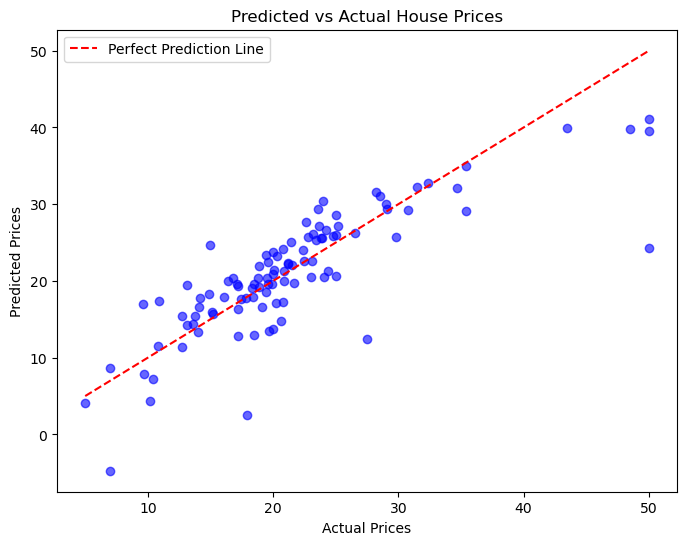

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for predictions vs actual values
plt.figure(figsize=(8, 6))

# Ploting actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Adding a line for perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Labels and title
plt.title('Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

# Show the plot
plt.show()

Interpretation from the graph:

* The plot compares predicted house prices (y-axis) with actual house prices (x-axis).

* Each blue dot represents one house's actual and predicted price.

* The red dashed line shows perfect prediction (predicted = actual).

* Dots above the line indicate overpredictions by the model.

* Dots below the line indicate underpredictions by the model.

* The spread of the blue dots shows the model's prediction error magnitude.

* Greater deviation from the red line means larger prediction errors.

**Conclusion from the Graph:**

The model's predictions for house prices show a moderate correlation with the actual prices, but there is significant scatter around the 

perfect prediction line. Many points deviate noticeably from the red dashed line, indicating frequent prediction errors. The model misses 

both high and low values, with some predictions being substantially off, especially for outliers. Overall, the model is not highly accurate.

# **Conclusion:**

This linear regression model is not reliable enough for accurate house price prediction. The errors and inconsistencies shown in the graph mean that we should not use this model for real-world predictions without significant improvements, such as better feature engineering, data preprocessing, or trying more advanced models like ensemble methods (Random Forest, Gradient Boosting, etc).